In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 1.5MB/s eta 0:00:011
    100% |████████████████████████████████| 1.7MB 870kB/s eta 0:00:011
    100% |████████████████████████████████| 419kB 3.3MB/s  eta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
Successfully built future networkx
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [8]:
import lightgbm as lgb

In [9]:
import data
import config

In [10]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

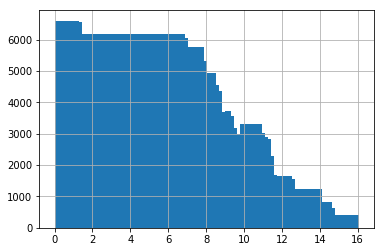

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [16]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [17]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [18]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [19]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [20]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [21]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [22]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


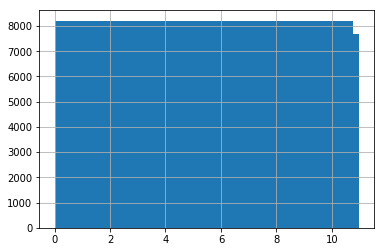

In [26]:
ydf.hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
from hyperopt import fmin, tpe, hp


In [29]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [30]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [31]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [32]:
best_mae=1e10

In [33]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,
          subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf,
         huber_delta):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [34]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(1e-3),np.log(0.01) ),
    'huber_delta':hp.uniform('huber_delta', 0.1,1.6 ),
}

In [35]:
def objective(args):
    print args
    return lgbcv(**args)



In [36]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 37.53866706232658, 'reg_alpha': 3.3631000968330613, 'colsample_bytree': 0.9648453108627701, 'min_sum_hessian_in_leaf': 0.002009542831389497, 'learning_rate': 0.008216648333776229, 'subsample': 0.7099488741967563, 'reg_lambda': 8.926884218464712, 'min_data_in_leaf': 765.3716536717725, 'huber_delta': 1.2446155664404723, 'max_depth': 7.414016569367407}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.42801	valid_1's l1: 1.60204   
[200]	training's l1: 1.10719	valid_1's l1: 1.37078   
[300]	training's l1: 0.988312	valid_1's l1: 1.28136  
[400]	training's l1: 0.93169	valid_1's l1: 1.24235   
[500]	training's l1: 0.894381	

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.46572	valid_1's l1: 1.40094   
[200]	training's l1: 1.14205	valid_1's l1: 1.32696   
[300]	training's l1: 1.01341	valid_1's l1: 1.32787   
Early stopping, best iteration is:                   
[239]	training's l1: 1.07885	valid_1's l1: 1.32012
quake                                                
15                                                   
(1.3201179782844712, 239)                            
mean score                                           
1.1931583921621993                                   
{'num_leaves': 66.40150449420709, 'reg_alpha': 0.015386594852700327, 'colsample_bytree': 0.7210177300483052, 'min_sum_hessian_in_leaf': 0.10191227061509257, 'learning_rate': 0.0023902388865220075, 'subsample': 0.5956378565334444, 'reg_lambda': 9.68135225623062, 'min_data_in_leaf': 27.55980591402156, 'huber_delta': 1.3833937204274618, 'max_depth': 8.09399879373542}
valid quake                      

[1800]	training's l1: 0.801949	valid_1's l1: 1.38839                         
[1900]	training's l1: 0.789705	valid_1's l1: 1.38729                         
[2000]	training's l1: 0.778253	valid_1's l1: 1.38597                         
[2100]	training's l1: 0.767891	valid_1's l1: 1.38522                         
[2200]	training's l1: 0.758086	valid_1's l1: 1.38451                         
[2300]	training's l1: 0.748901	valid_1's l1: 1.38366                         
[2400]	training's l1: 0.740414	valid_1's l1: 1.3833                          
[2500]	training's l1: 0.732213	valid_1's l1: 1.3828                          
[2600]	training's l1: 0.723813	valid_1's l1: 1.38202                         
[2700]	training's l1: 0.715579	valid_1's l1: 1.38154                         
[2800]	training's l1: 0.70741	valid_1's l1: 1.38109                          
[2900]	training's l1: 0.699592	valid_1's l1: 1.38012                         
[3000]	training's l1: 0.692623	valid_1's l1: 1.37933            

quake                                                                        
10                                                                           
(0.963361681250035, 2265)                                                    
valid quake                                                                  
11                                                                           
(381198, 450)                                                                
(381198,)                                                                    
(28196, 450)                                                                 
(28196,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 2.11181	valid_1's l1: 2.11912                           
[200]	training's l1: 1.72317	valid_1's l1: 1.69473                           
[300]	training's l1: 1.5024	valid_1's l1: 1.45104               

1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 2.36556	valid_1's l1: 2.36921                              
[200]	training's l1: 2.07449	valid_1's l1: 2.08472                              
[300]	training's l1: 1.85373	valid_1's l1: 1.90117                              
[400]	training's l1: 1.68646	valid_1's l1: 1.78022                              
[500]	training's l1: 1.55696	valid_1's l1: 1.68904                              
[600]	training's l1: 1.45443	valid_1's l1: 1.61708                              
[700]	training's l1: 1.36969	valid_1's l

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.40405	valid_1's l1: 2.40335                              
[200]	training's l1: 2.12604	valid_1's l1: 2.12812                              
[300]	training's l1: 1.89902	valid_1's l1: 1.91885                              
[400]	training's l1: 1.72226	valid_1's l1: 1.76783                              
[500]	training's l1: 1.59138	valid_1's l1: 1.67432                              
[600]	training's l1: 1.49058	valid_1's l1: 1.61961                              
[700]	training's l1: 1.40759	valid_1's l1: 1.58111                              
[800]	training's l1: 1.33721	valid_1's l1: 1.55356                              
[900]	training's l1: 1.27663	valid_1's l1: 1.53298                              
[1000]	training's l1: 1.22396	valid_1's l1: 1.51688                             
[1100]	training's l1: 1.17817	valid_1's l1: 1.50425                             
[1200]	training's l1: 1.1384

[2500]	training's l1: 0.889481	valid_1's l1: 1.53217                            
[2600]	training's l1: 0.879986	valid_1's l1: 1.53025                            
[2700]	training's l1: 0.871099	valid_1's l1: 1.52863                            
[2800]	training's l1: 0.8627	valid_1's l1: 1.52693                              
[2900]	training's l1: 0.854749	valid_1's l1: 1.52551                            
[3000]	training's l1: 0.847189	valid_1's l1: 1.52402                            
[3100]	training's l1: 0.839962	valid_1's l1: 1.52245                            
[3200]	training's l1: 0.832992	valid_1's l1: 1.52141                            
[3300]	training's l1: 0.826158	valid_1's l1: 1.52033                            
[3400]	training's l1: 0.819612	valid_1's l1: 1.51924                            
[3500]	training's l1: 0.813261	valid_1's l1: 1.51855                            
[3600]	training's l1: 0.80719	valid_1's l1: 1.51749                             
[3700]	training's l1: 0.8011

[1300]	training's l1: 1.11025	valid_1's l1: 1.12749                             
[1400]	training's l1: 1.07967	valid_1's l1: 1.11368                             
[1500]	training's l1: 1.05273	valid_1's l1: 1.10268                             
[1600]	training's l1: 1.02894	valid_1's l1: 1.09382                             
[1700]	training's l1: 1.00785	valid_1's l1: 1.08645                             
[1800]	training's l1: 0.98898	valid_1's l1: 1.08043                             
[1900]	training's l1: 0.972037	valid_1's l1: 1.07517                            
[2000]	training's l1: 0.956696	valid_1's l1: 1.07124                            
[2100]	training's l1: 0.942732	valid_1's l1: 1.06774                            
[2200]	training's l1: 0.929978	valid_1's l1: 1.06488                            
[2300]	training's l1: 0.91833	valid_1's l1: 1.06218                             
[2400]	training's l1: 0.907332	valid_1's l1: 1.05974                            
[2500]	training's l1: 0.8969

[1200]	training's l1: 0.832581	valid_1's l1: 1.24267                            
[1300]	training's l1: 0.821355	valid_1's l1: 1.24247                            
Early stopping, best iteration is:                                              
[1259]	training's l1: 0.826282	valid_1's l1: 1.24233
quake                                                                           
1                                                                               
(1.2423292324630635, 1259)                                                      
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                

[2000]	training's l1: 0.780399	valid_1's l1: 0.947414                           
[2100]	training's l1: 0.772038	valid_1's l1: 0.947139                           
[2200]	training's l1: 0.763841	valid_1's l1: 0.946266                           
[2300]	training's l1: 0.75645	valid_1's l1: 0.945901                            
[2400]	training's l1: 0.748287	valid_1's l1: 0.944864                           
[2500]	training's l1: 0.74083	valid_1's l1: 0.945002                            
Early stopping, best iteration is:                                              
[2431]	training's l1: 0.746095	valid_1's l1: 0.944796
quake                                                                           
9                                                                               
(0.9447955078604563, 2431)                                                      
valid quake                                                                     
10                                                     

[1500]	training's l1: 0.651936	valid_1's l1: 1.25272                            
Early stopping, best iteration is:                                              
[1463]	training's l1: 0.657002	valid_1's l1: 1.25266
quake                                                                           
1                                                                               
(1.252657291829406, 1463)                                                       
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 r

8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.53888	valid_1's l1: 1.64831                              
[200]	training's l1: 1.18713	valid_1's l1: 1.60954                              
[300]	training's l1: 1.03759	valid_1's l1: 1.60497                              
[400]	training's l1: 0.953942	valid_1's l1: 1.59674                             
[500]	training's l1: 0.898236	valid_1's l1: 1.58784                             
[600]	training's l1: 0.85742	valid_1's l1: 1.57742                              
[700]	training's l1: 0.82584

[3300]	training's l1: 0.499071	valid_1's l1: 1.01424                            
[3400]	training's l1: 0.492055	valid_1's l1: 1.0131                             
[3500]	training's l1: 0.485808	valid_1's l1: 1.01294                            
[3600]	training's l1: 0.479547	valid_1's l1: 1.01266                            
[3700]	training's l1: 0.473525	valid_1's l1: 1.01214                            
[3800]	training's l1: 0.467351	valid_1's l1: 1.01183                            
[3900]	training's l1: 0.461195	valid_1's l1: 1.01096                            
[4000]	training's l1: 0.455274	valid_1's l1: 1.01069                            
[4100]	training's l1: 0.449785	valid_1's l1: 1.01039                            
[4200]	training's l1: 0.4443	valid_1's l1: 1.0098                               
[4300]	training's l1: 0.438848	valid_1's l1: 1.00951                            
[4400]	training's l1: 0.433945	valid_1's l1: 1.00892                            
[4500]	training's l1: 0.4286

[1300]	training's l1: 0.605452	valid_1's l1: 0.935408                           
[1400]	training's l1: 0.591344	valid_1's l1: 0.935272                           
[1500]	training's l1: 0.577152	valid_1's l1: 0.9344                             
[1600]	training's l1: 0.56326	valid_1's l1: 0.933534                            
[1700]	training's l1: 0.550087	valid_1's l1: 0.933101                           
[1800]	training's l1: 0.536288	valid_1's l1: 0.931906                           
[1900]	training's l1: 0.525162	valid_1's l1: 0.931434                           
[2000]	training's l1: 0.513799	valid_1's l1: 0.930396                           
[2100]	training's l1: 0.503284	valid_1's l1: 0.929013                           
[2200]	training's l1: 0.492525	valid_1's l1: 0.928385                           
[2300]	training's l1: 0.48198	valid_1's l1: 0.927643                            
[2400]	training's l1: 0.472574	valid_1's l1: 0.926616                           
[2500]	training's l1: 0.4634

quake                                                                           
8                                                                               
(1.4642011254881186, 0)                                                         
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.45988	valid_1's l1: 1.43225                              
[200]	training's l1: 1.10453	valid_1's l1: 1.15788                              
[300]	training's l1: 0.95389

quake                                                                           
15                                                                              
(1.2998947487953025, 331)                                                       
mean score                                                                      
1.197307501763266                                                               
{'num_leaves': 117.34786995792129, 'reg_alpha': 0.14443098162491047, 'colsample_bytree': 0.4663885678459062, 'min_sum_hessian_in_leaf': 0.128617761466102, 'learning_rate': 0.004024333707374569, 'subsample': 0.5475842770057744, 'reg_lambda': 0.045495475345785935, 'min_data_in_leaf': 2366.8110342207947, 'huber_delta': 0.3077862697380337, 'max_depth': 6.883597685534909}
valid quake                                                                     
1                                                                               
(379874, 450)                                                  

[900]	training's l1: 0.977164	valid_1's l1: 1.45247                             
[1000]	training's l1: 0.964565	valid_1's l1: 1.44346                            
[1100]	training's l1: 0.95377	valid_1's l1: 1.43629                             
[1200]	training's l1: 0.944464	valid_1's l1: 1.43134                            
[1300]	training's l1: 0.936515	valid_1's l1: 1.42795                            
[1400]	training's l1: 0.929627	valid_1's l1: 1.4259                             
[1500]	training's l1: 0.924037	valid_1's l1: 1.4241                             
[1600]	training's l1: 0.918891	valid_1's l1: 1.42257                            
[1700]	training's l1: 0.91407	valid_1's l1: 1.42145                             
[1800]	training's l1: 0.909464	valid_1's l1: 1.42082                            
[1900]	training's l1: 0.90513	valid_1's l1: 1.42036                             
[2000]	training's l1: 0.900145	valid_1's l1: 1.42066                            
Early stopping, best iterati

quake                                                                           
11                                                                              
(0.9506202196563635, 1165)                                                      
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.85263	valid_1's l1: 1.77666                              
[200]	training's l1: 1.42998	valid_1's l1: 1.35133                              
[300]	training's l1: 1.24764

[900]	training's l1: 1.0639	valid_1's l1: 1.29593                               
[1000]	training's l1: 1.05045	valid_1's l1: 1.28244                             
[1100]	training's l1: 1.03902	valid_1's l1: 1.27296                             
[1200]	training's l1: 1.02879	valid_1's l1: 1.26636                             
[1300]	training's l1: 1.01955	valid_1's l1: 1.26167                             
[1400]	training's l1: 1.01167	valid_1's l1: 1.25924                             
[1500]	training's l1: 1.00471	valid_1's l1: 1.25714                             
[1600]	training's l1: 0.998294	valid_1's l1: 1.25609                            
Early stopping, best iteration is:                                              
[1599]	training's l1: 0.998371	valid_1's l1: 1.25604
quake                                                                           
2                                                                               
(1.2560422395725068, 1599)                              

[3200]	training's l1: 0.92539	valid_1's l1: 1.30505                             
[3300]	training's l1: 0.922558	valid_1's l1: 1.30489                            
Early stopping, best iteration is:                                              
[3252]	training's l1: 0.923932	valid_1's l1: 1.30478
quake                                                                           
7                                                                               
(1.3047793784799444, 3252)                                                      
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                

[300]	training's l1: 1.36351	valid_1's l1: 1.44278                              
[400]	training's l1: 1.25224	valid_1's l1: 1.38325                              
[500]	training's l1: 1.18453	valid_1's l1: 1.34109                              
[600]	training's l1: 1.13953	valid_1's l1: 1.30894                              
[700]	training's l1: 1.10912	valid_1's l1: 1.28487                              
[800]	training's l1: 1.08699	valid_1's l1: 1.26492                              
[900]	training's l1: 1.06983	valid_1's l1: 1.24851                              
[1000]	training's l1: 1.05622	valid_1's l1: 1.23508                             
[1100]	training's l1: 1.04502	valid_1's l1: 1.22391                             
[1200]	training's l1: 1.03527	valid_1's l1: 1.21468                             
[1300]	training's l1: 1.02674	valid_1's l1: 1.20724                             
[1400]	training's l1: 1.01911	valid_1's l1: 1.201                               
[1500]	training's l1: 1.0125

[200]	training's l1: 1.21583	valid_1's l1: 1.19439                              
[300]	training's l1: 1.06931	valid_1's l1: 1.0967                               
[400]	training's l1: 0.991899	valid_1's l1: 1.06745                             
[500]	training's l1: 0.943745	valid_1's l1: 1.06096                             
[600]	training's l1: 0.910645	valid_1's l1: 1.06135                             
Early stopping, best iteration is:                                              
[520]	training's l1: 0.936104	valid_1's l1: 1.06079
quake                                                                           
4                                                                               
(1.0607873217380615, 520)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                            

quake                                                                           
12                                                                              
(1.0443440952001837, 1529)                                                      
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.57517	valid_1's l1: 1.52755                              
[200]	training's l1: 1.22946	valid_1's l1: 1.33459                              
[300]	training's l1: 1.07413

[2700]	training's l1: 1.05107	valid_1's l1: 0.934105                            
[2800]	training's l1: 1.04816	valid_1's l1: 0.932963                            
[2900]	training's l1: 1.04543	valid_1's l1: 0.932239                            
[3000]	training's l1: 1.04285	valid_1's l1: 0.931723                            
[3100]	training's l1: 1.04043	valid_1's l1: 0.930759                            
[3200]	training's l1: 1.03813	valid_1's l1: 0.930263                            
[3300]	training's l1: 1.03594	valid_1's l1: 0.929952                            
[3400]	training's l1: 1.03395	valid_1's l1: 0.929346                            
[3500]	training's l1: 1.03203	valid_1's l1: 0.928951                            
[3600]	training's l1: 1.03025	valid_1's l1: 0.928671                            
[3700]	training's l1: 1.02858	valid_1's l1: 0.928223                            
[3800]	training's l1: 1.02695	valid_1's l1: 0.927796                            
[3900]	training's l1: 1.0252

[2300]	training's l1: 1.04296	valid_1's l1: 1.32581                             
[2400]	training's l1: 1.03876	valid_1's l1: 1.32374                             
[2500]	training's l1: 1.03481	valid_1's l1: 1.32193                             
[2600]	training's l1: 1.03118	valid_1's l1: 1.32018                             
[2700]	training's l1: 1.02783	valid_1's l1: 1.31919                             
[2800]	training's l1: 1.0246	valid_1's l1: 1.31793                              
[2900]	training's l1: 1.02163	valid_1's l1: 1.3165                              
[3000]	training's l1: 1.01888	valid_1's l1: 1.31543                             
[3100]	training's l1: 1.01632	valid_1's l1: 1.31472                             
[3200]	training's l1: 1.01382	valid_1's l1: 1.31372                             
[3300]	training's l1: 1.01148	valid_1's l1: 1.31299                             
[3400]	training's l1: 1.00923	valid_1's l1: 1.31221                             
[3500]	training's l1: 1.0070

(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.31929	valid_1's l1: 2.25227                              
[200]	training's l1: 1.98664	valid_1's l1: 1.87299                              
[300]	training's l1: 1.72627	valid_1's l1: 1.58493                              
[400]	training's l1: 1.54992	valid_1's l1: 1.39328                              
[500]	training's l1: 1.44325	valid_1's l1: 1.31677                              
[600]	training's l1: 1.36462	valid_1's l1: 1.26385                              
[700]	training's l1: 1.3032	valid_1's l1: 1.22445                               
[800]	training's l1: 1.25724	valid_1's l1: 1.19542                              
[900]	training's l1: 1.22181	valid_1's l1: 1.17348                              
[1000]	training's l1: 1.19355	valid_1's l1: 1.15729                             
[1100]	training's l1: 1.1709

[600]	training's l1: 1.43502	valid_1's l1: 1.62125                               
[700]	training's l1: 1.35409	valid_1's l1: 1.56648                               
[800]	training's l1: 1.28702	valid_1's l1: 1.52109                               
[900]	training's l1: 1.23063	valid_1's l1: 1.48342                               
[1000]	training's l1: 1.1828	valid_1's l1: 1.45126                               
[1100]	training's l1: 1.14236	valid_1's l1: 1.42396                              
[1200]	training's l1: 1.10795	valid_1's l1: 1.40088                              
[1300]	training's l1: 1.07855	valid_1's l1: 1.38108                              
[1400]	training's l1: 1.05326	valid_1's l1: 1.3641                               
[1500]	training's l1: 1.03142	valid_1's l1: 1.3495                               
[1600]	training's l1: 1.01235	valid_1's l1: 1.33678                              
[1700]	training's l1: 0.995701	valid_1's l1: 1.32584                             
[1800]	training'

[100]	training's l1: 2.39609	valid_1's l1: 2.39727                               
[200]	training's l1: 2.11321	valid_1's l1: 2.11585                               
[300]	training's l1: 1.87965	valid_1's l1: 1.89535                               
[400]	training's l1: 1.69898	valid_1's l1: 1.74143                               
[500]	training's l1: 1.56917	valid_1's l1: 1.65275                               
[600]	training's l1: 1.47109	valid_1's l1: 1.60217                               
[700]	training's l1: 1.39077	valid_1's l1: 1.56826                               
[800]	training's l1: 1.32377	valid_1's l1: 1.54395                               
[900]	training's l1: 1.26687	valid_1's l1: 1.52557                               
[1000]	training's l1: 1.21799	valid_1's l1: 1.51109                              
[1100]	training's l1: 1.17599	valid_1's l1: 1.49961                              
[1200]	training's l1: 1.14004	valid_1's l1: 1.4902                               
[1300]	training'

(384759, 450)                                                                    
(384759,)                                                                        
(24635, 450)                                                                     
(24635,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.40129	valid_1's l1: 2.36578                               
[200]	training's l1: 2.11953	valid_1's l1: 2.04764                               
[300]	training's l1: 1.8869	valid_1's l1: 1.79564                                
[400]	training's l1: 1.70776	valid_1's l1: 1.6068                                
[500]	training's l1: 1.57913	valid_1's l1: 1.47802                               
[600]	training's l1: 1.48118	valid_1's l1: 1.38537                               
[700]	training's l1: 1.40111	valid_1's l1: 1.31437                               
[800]	training's

[3100]	training's l1: 0.900777	valid_1's l1: 1.04197                             
[3200]	training's l1: 0.895899	valid_1's l1: 1.04105                             
[3300]	training's l1: 0.891198	valid_1's l1: 1.0402                              
[3400]	training's l1: 0.886797	valid_1's l1: 1.03927                             
[3500]	training's l1: 0.882455	valid_1's l1: 1.03853                             
[3600]	training's l1: 0.87845	valid_1's l1: 1.03792                              
[3700]	training's l1: 0.874646	valid_1's l1: 1.03724                             
[3800]	training's l1: 0.870927	valid_1's l1: 1.03676                             
[3900]	training's l1: 0.867347	valid_1's l1: 1.03621                             
[4000]	training's l1: 0.863836	valid_1's l1: 1.03561                             
[4100]	training's l1: 0.860554	valid_1's l1: 1.03511                             
[4200]	training's l1: 0.857484	valid_1's l1: 1.03457                             
[4300]	training'

[2500]	training's l1: 0.935183	valid_1's l1: 1.26147                             
[2600]	training's l1: 0.926605	valid_1's l1: 1.25657                             
[2700]	training's l1: 0.918608	valid_1's l1: 1.25219                             
[2800]	training's l1: 0.911263	valid_1's l1: 1.24798                             
[2900]	training's l1: 0.904549	valid_1's l1: 1.24418                             
[3000]	training's l1: 0.898228	valid_1's l1: 1.24172                             
[3100]	training's l1: 0.892255	valid_1's l1: 1.2388                              
[3200]	training's l1: 0.886526	valid_1's l1: 1.23654                             
[3300]	training's l1: 0.881127	valid_1's l1: 1.23442                             
[3400]	training's l1: 0.876082	valid_1's l1: 1.23252                             
[3500]	training's l1: 0.871129	valid_1's l1: 1.23088                             
[3600]	training's l1: 0.866247	valid_1's l1: 1.22992                             
[3700]	training'

[100]	training's l1: 2.4557	valid_1's l1: 2.43845                                
[200]	training's l1: 2.21185	valid_1's l1: 2.19687                               
[300]	training's l1: 2.00145	valid_1's l1: 1.99744                               
[400]	training's l1: 1.82491	valid_1's l1: 1.84143                               
[500]	training's l1: 1.68512	valid_1's l1: 1.72506                               
[600]	training's l1: 1.57929	valid_1's l1: 1.65365                               
[700]	training's l1: 1.4945	valid_1's l1: 1.60509                                
[800]	training's l1: 1.42324	valid_1's l1: 1.56859                               
[900]	training's l1: 1.3621	valid_1's l1: 1.5416                                 
[1000]	training's l1: 1.30878	valid_1's l1: 1.52231                              
[1100]	training's l1: 1.26194	valid_1's l1: 1.5066                               
[1200]	training's l1: 1.22075	valid_1's l1: 1.49315                              
[1300]	training'

[300]	training's l1: 2.00863	valid_1's l1: 1.90198                               
[400]	training's l1: 1.83348	valid_1's l1: 1.71133                               
[500]	training's l1: 1.69498	valid_1's l1: 1.56461                               
[600]	training's l1: 1.58899	valid_1's l1: 1.45645                               
[700]	training's l1: 1.50425	valid_1's l1: 1.37669                               
[800]	training's l1: 1.4331	valid_1's l1: 1.31327                                
[900]	training's l1: 1.37202	valid_1's l1: 1.26173                               
[1000]	training's l1: 1.31861	valid_1's l1: 1.21888                              
[1100]	training's l1: 1.27173	valid_1's l1: 1.18274                              
[1200]	training's l1: 1.23035	valid_1's l1: 1.1521                               
[1300]	training's l1: 1.19364	valid_1's l1: 1.12631                              
[1400]	training's l1: 1.16119	valid_1's l1: 1.10394                              
[1500]	training'

[3900]	training's l1: 0.877977	valid_1's l1: 1.03818                             
[4000]	training's l1: 0.873274	valid_1's l1: 1.0369                              
[4100]	training's l1: 0.868613	valid_1's l1: 1.03576                             
[4200]	training's l1: 0.863886	valid_1's l1: 1.03446                             
[4300]	training's l1: 0.859399	valid_1's l1: 1.03319                             
[4400]	training's l1: 0.855099	valid_1's l1: 1.03231                             
[4500]	training's l1: 0.850874	valid_1's l1: 1.03141                             
[4600]	training's l1: 0.846629	valid_1's l1: 1.03076                             
[4700]	training's l1: 0.842633	valid_1's l1: 1.02965                             
[4800]	training's l1: 0.838616	valid_1's l1: 1.02902                             
[4900]	training's l1: 0.834938	valid_1's l1: 1.02845                             
[5000]	training's l1: 0.831324	valid_1's l1: 1.02783                             
quake           

(373099, 450)                                                                    
(373099,)                                                                        
(36295, 450)                                                                     
(36295,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.77446	valid_1's l1: 1.97965                               
[200]	training's l1: 1.37855	valid_1's l1: 1.67669                               
[300]	training's l1: 1.172	valid_1's l1: 1.51706                                 
[400]	training's l1: 1.04934	valid_1's l1: 1.41681                               
[500]	training's l1: 0.975156	valid_1's l1: 1.35622                              
[600]	training's l1: 0.927671	valid_1's l1: 1.31955                              
[700]	training's l1: 0.894596	valid_1's l1: 1.2954                               
[800]	training's

[900]	training's l1: 0.869002	valid_1's l1: 0.944406                             
[1000]	training's l1: 0.854388	valid_1's l1: 0.941253                            
[1100]	training's l1: 0.841607	valid_1's l1: 0.93925                             
[1200]	training's l1: 0.830482	valid_1's l1: 0.937952                            
[1300]	training's l1: 0.821408	valid_1's l1: 0.936281                            
[1400]	training's l1: 0.812636	valid_1's l1: 0.934506                            
[1500]	training's l1: 0.802993	valid_1's l1: 0.93333                             
[1600]	training's l1: 0.793773	valid_1's l1: 0.932155                            
[1700]	training's l1: 0.784388	valid_1's l1: 0.931625                            
[1800]	training's l1: 0.775312	valid_1's l1: 0.930973                            
[1900]	training's l1: 0.766489	valid_1's l1: 0.930206                            
[2000]	training's l1: 0.757346	valid_1's l1: 0.929396                            
[2100]	training'

[1500]	training's l1: 0.982934	valid_1's l1: 1.23023                             
[1600]	training's l1: 0.972415	valid_1's l1: 1.2244                              
[1700]	training's l1: 0.963506	valid_1's l1: 1.21935                             
[1800]	training's l1: 0.955524	valid_1's l1: 1.21484                             
[1900]	training's l1: 0.948122	valid_1's l1: 1.21136                             
[2000]	training's l1: 0.941231	valid_1's l1: 1.20944                             
[2100]	training's l1: 0.934542	valid_1's l1: 1.20782                             
[2200]	training's l1: 0.928298	valid_1's l1: 1.20598                             
[2300]	training's l1: 0.922383	valid_1's l1: 1.2052                              
[2400]	training's l1: 0.91664	valid_1's l1: 1.20454                              
[2500]	training's l1: 0.911416	valid_1's l1: 1.20483                             
Early stopping, best iteration is:                                               
[2401]	training'

[800]	training's l1: 1.1718	valid_1's l1: 1.50014                                
[900]	training's l1: 1.12545	valid_1's l1: 1.45981                               
[1000]	training's l1: 1.08819	valid_1's l1: 1.42767                              
[1100]	training's l1: 1.05806	valid_1's l1: 1.40186                              
[1200]	training's l1: 1.03376	valid_1's l1: 1.38252                              
[1300]	training's l1: 1.01407	valid_1's l1: 1.36715                              
[1400]	training's l1: 0.997757	valid_1's l1: 1.3549                              
[1500]	training's l1: 0.984427	valid_1's l1: 1.34514                             
[1600]	training's l1: 0.972822	valid_1's l1: 1.33712                             
[1700]	training's l1: 0.962341	valid_1's l1: 1.33069                             
[1800]	training's l1: 0.953267	valid_1's l1: 1.32618                             
[1900]	training's l1: 0.944433	valid_1's l1: 1.32337                             
[2000]	training'

[3400]	training's l1: 0.890653	valid_1's l1: 1.03078                             
[3500]	training's l1: 0.88644	valid_1's l1: 1.03006                              
Early stopping, best iteration is:                                               
[3484]	training's l1: 0.887137	valid_1's l1: 1.02998
quake                                                                            
12                                                                               
(1.029977021100816, 3484)                                                        
valid quake                                                                      
13                                                                               
(387509, 450)                                                                    
(387509,)                                                                        
(21885, 450)                                                                     
(21885,)                                     

quake                                                                            
14                                                                               
(1.3523942249847434, 2456)                                                       
valid quake                                                                      
15                                                                               
(385215, 450)                                                                    
(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.26121	valid_1's l1: 1.97942                               
[200]	training's l1: 1.8971	valid_1's l1: 1.57842                                
[300]	training's

Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.17438	valid_1's l1: 2.20516                               
[200]	training's l1: 1.77397	valid_1's l1: 1.8403                                
[300]	training's l1: 1.49579	valid_1's l1: 1.64355                               
[400]	training's l1: 1.33638	valid_1's l1: 1.58572                               
[500]	training's l1: 1.22783	valid_1's l1: 1.55919                               
[600]	training's l1: 1.14805	valid_1's l1: 1.54142                               
[700]	training's l1: 1.08736	valid_1's l1: 1.52748                               
[800]	training's l1: 1.03875	valid_1's l1: 1.51548                               
[900]	training's l1: 0.999619	valid_1's l1: 1.50548                              
[1000]	training's l1: 0.966962	valid_1's l1: 1.49812                             
[1100]	training's l1: 0.940176	valid_1's l1: 1.49077                             
[1200]	training'

[3600]	training's l1: 0.685055	valid_1's l1: 0.967384                            
[3700]	training's l1: 0.679869	valid_1's l1: 0.967432                            
Early stopping, best iteration is:                                               
[3628]	training's l1: 0.683561	valid_1's l1: 0.967252
quake                                                                            
9                                                                                
(0.9672517673207603, 3628)                                                       
valid quake                                                                      
10                                                                               
(380166, 450)                                                                    
(380166,)                                                                        
(29228, 450)                                                                     
(29228,)                                    

(37761, 450)                                                                     
(37761,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 2.17398	valid_1's l1: 2.2934                                
[200]	training's l1: 1.7754	valid_1's l1: 1.99799                                
[300]	training's l1: 1.49543	valid_1's l1: 1.79609                               
[400]	training's l1: 1.32997	valid_1's l1: 1.67993                               
[500]	training's l1: 1.21986	valid_1's l1: 1.60155                               
[600]	training's l1: 1.13869	valid_1's l1: 1.54381                               
[700]	training's l1: 1.07666	valid_1's l1: 1.49965                               
[800]	training's l1: 1.02745	valid_1's l1: 1.46536                               
[900]	training's l1: 0.986671	valid_1's l1: 1.43868                              
[1000]	training'

[300]	training's l1: 1.09461	valid_1's l1: 1.4795                                
[400]	training's l1: 0.998682	valid_1's l1: 1.44061                              
[500]	training's l1: 0.942932	valid_1's l1: 1.41725                              
[600]	training's l1: 0.908483	valid_1's l1: 1.4054                               
[700]	training's l1: 0.879739	valid_1's l1: 1.4001                               
[800]	training's l1: 0.854823	valid_1's l1: 1.3991                               
[900]	training's l1: 0.833071	valid_1's l1: 1.39795                              
[1000]	training's l1: 0.816153	valid_1's l1: 1.39691                             
[1100]	training's l1: 0.799933	valid_1's l1: 1.39512                             
[1200]	training's l1: 0.783566	valid_1's l1: 1.39309                             
[1300]	training's l1: 0.767678	valid_1's l1: 1.39145                             
[1400]	training's l1: 0.752618	valid_1's l1: 1.39007                             
[1500]	training'

valid quake                                                                      
15                                                                               
(385215, 450)                                                                    
(385215,)                                                                        
(24179, 450)                                                                     
(24179,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.63826	valid_1's l1: 1.52005                               
[200]	training's l1: 1.27163	valid_1's l1: 1.37135                               
[300]	training's l1: 1.09218	valid_1's l1: 1.34281                               
[400]	training's l1: 0.995322	valid_1's l1: 1.34836                              
Early stopping, best iteration is:                                               
[309]	training's

(29228,)                                                                         
Training until validation scores don't improve for 100 rounds.                   
[100]	training's l1: 1.45354	valid_1's l1: 1.35071                               
[200]	training's l1: 1.18316	valid_1's l1: 1.06685                               
[300]	training's l1: 1.08915	valid_1's l1: 1.00083                               
[400]	training's l1: 1.04686	valid_1's l1: 0.981378                              
[500]	training's l1: 1.01991	valid_1's l1: 0.9746                                
[600]	training's l1: 1.0002	valid_1's l1: 0.972075                               
[700]	training's l1: 0.986356	valid_1's l1: 0.969238                             
[800]	training's l1: 0.974618	valid_1's l1: 0.967577                             
[900]	training's l1: 0.963094	valid_1's l1: 0.965465                             
[1000]	training's l1: 0.951151	valid_1's l1: 0.963882                            
[1100]	training'

[3100]	training's l1: 0.729239	valid_1's l1: 1.28641                             
[3200]	training's l1: 0.725121	valid_1's l1: 1.28592                             
[3300]	training's l1: 0.720994	valid_1's l1: 1.28576                             
[3400]	training's l1: 0.716848	valid_1's l1: 1.28509                             
[3500]	training's l1: 0.71326	valid_1's l1: 1.28448                              
[3600]	training's l1: 0.709258	valid_1's l1: 1.28324                             
[3700]	training's l1: 0.705731	valid_1's l1: 1.28262                             
[3800]	training's l1: 0.702539	valid_1's l1: 1.28216                             
[3900]	training's l1: 0.699422	valid_1's l1: 1.28155                             
[4000]	training's l1: 0.695803	valid_1's l1: 1.28106                             
[4100]	training's l1: 0.692553	valid_1's l1: 1.28069                             
[4200]	training's l1: 0.689587	valid_1's l1: 1.28058                             
[4300]	training'

[1300]	training's l1: 0.838367	valid_1's l1: 1.34243                             
[1400]	training's l1: 0.825335	valid_1's l1: 1.3385                              
[1500]	training's l1: 0.813233	valid_1's l1: 1.33586                             
[1600]	training's l1: 0.802513	valid_1's l1: 1.33433                             
[1700]	training's l1: 0.792663	valid_1's l1: 1.33427                             
[1800]	training's l1: 0.783887	valid_1's l1: 1.33403                             
[1900]	training's l1: 0.77559	valid_1's l1: 1.33379                              
[2000]	training's l1: 0.768069	valid_1's l1: 1.3331                              
[2100]	training's l1: 0.760507	valid_1's l1: 1.33268                             
[2200]	training's l1: 0.753919	valid_1's l1: 1.33237                             
[2300]	training's l1: 0.747935	valid_1's l1: 1.33219                             
[2400]	training's l1: 0.742786	valid_1's l1: 1.33176                             
[2500]	training'

[1200]	training's l1: 0.876579	valid_1's l1: 1.20445                             
[1300]	training's l1: 0.863013	valid_1's l1: 1.19719                             
[1400]	training's l1: 0.850615	valid_1's l1: 1.19108                             
[1500]	training's l1: 0.83961	valid_1's l1: 1.1859                               
[1600]	training's l1: 0.829265	valid_1's l1: 1.18207                             
[1700]	training's l1: 0.819463	valid_1's l1: 1.17876                             
[1800]	training's l1: 0.81085	valid_1's l1: 1.17641                              
[1900]	training's l1: 0.803473	valid_1's l1: 1.17422                             
[2000]	training's l1: 0.796266	valid_1's l1: 1.1722                              
[2100]	training's l1: 0.788967	valid_1's l1: 1.17071                             
[2200]	training's l1: 0.782822	valid_1's l1: 1.16898                             
[2300]	training's l1: 0.778781	valid_1's l1: 1.16797                             
[2400]	training'

[4400]	training's l1: 0.903548	valid_1's l1: 1.2648                              
[4500]	training's l1: 0.901084	valid_1's l1: 1.26396                             
[4600]	training's l1: 0.898567	valid_1's l1: 1.26333                             
[4700]	training's l1: 0.896141	valid_1's l1: 1.26284                             
[4800]	training's l1: 0.893529	valid_1's l1: 1.26239                             
[4900]	training's l1: 0.891049	valid_1's l1: 1.26209                             
[5000]	training's l1: 0.88868	valid_1's l1: 1.26156                              
quake                                                                            
2                                                                                
(1.2615592003480458, 0)                                                          
valid quake                                                                      
3                                                                                
(386763, 450)   

[2800]	training's l1: 0.963696	valid_1's l1: 1.4139                               
[2900]	training's l1: 0.958845	valid_1's l1: 1.41156                              
[3000]	training's l1: 0.95432	valid_1's l1: 1.40927                               
[3100]	training's l1: 0.950058	valid_1's l1: 1.40757                              
[3200]	training's l1: 0.946063	valid_1's l1: 1.40571                              
[3300]	training's l1: 0.942272	valid_1's l1: 1.4041                               
[3400]	training's l1: 0.938684	valid_1's l1: 1.40271                              
[3500]	training's l1: 0.935339	valid_1's l1: 1.40146                              
[3600]	training's l1: 0.93223	valid_1's l1: 1.4006                                
[3700]	training's l1: 0.929263	valid_1's l1: 1.39973                              
[3800]	training's l1: 0.926526	valid_1's l1: 1.3989                               
[3900]	training's l1: 0.923963	valid_1's l1: 1.39836                              
[400

[2300]	training's l1: 1.00511	valid_1's l1: 0.987511                              
[2400]	training's l1: 0.998109	valid_1's l1: 0.983613                             
[2500]	training's l1: 0.991822	valid_1's l1: 0.980283                             
[2600]	training's l1: 0.985887	valid_1's l1: 0.977338                             
[2700]	training's l1: 0.9805	valid_1's l1: 0.974755                               
[2800]	training's l1: 0.975528	valid_1's l1: 0.972386                             
[2900]	training's l1: 0.970845	valid_1's l1: 0.970422                             
[3000]	training's l1: 0.966367	valid_1's l1: 0.968708                             
[3100]	training's l1: 0.96208	valid_1's l1: 0.967246                              
[3200]	training's l1: 0.957861	valid_1's l1: 0.965509                             
[3300]	training's l1: 0.953769	valid_1's l1: 0.963836                             
[3400]	training's l1: 0.949856	valid_1's l1: 0.962342                             
[350

[5000]	training's l1: 0.902415	valid_1's l1: 1.16685                              
quake                                                                             
13                                                                                
(1.1668499768174623, 0)                                                           
valid quake                                                                       
14                                                                                
(371633, 450)                                                                     
(371633,)                                                                         
(37761, 450)                                                                      
(37761,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.40892	valid_1's l1: 2.48094                                
[200

(386763,)                                                                         
(22631, 450)                                                                      
(22631,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.32858	valid_1's l1: 2.28397                                
[200]	training's l1: 2.00742	valid_1's l1: 1.88705                                
[300]	training's l1: 1.75121	valid_1's l1: 1.57558                                
[400]	training's l1: 1.55854	valid_1's l1: 1.37082                                
[500]	training's l1: 1.42406	valid_1's l1: 1.26235                                
[600]	training's l1: 1.32378	valid_1's l1: 1.19634                                
[700]	training's l1: 1.24416	valid_1's l1: 1.14505                                
[800]	training's l1: 1.17933	valid_1's l1: 1.10503                                
[900

[5000]	training's l1: 0.625775	valid_1's l1: 1.40964                              
quake                                                                             
6                                                                                 
(1.4096408036983394, 0)                                                           
valid quake                                                                       
7                                                                                 
(368154, 450)                                                                     
(368154,)                                                                         
(41240, 450)                                                                      
(41240,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.32291	valid_1's l1: 2.35295                                
[200

quake                                                                             
11                                                                                
(0.9732885091454899, 2155)                                                        
valid quake                                                                       
12                                                                                
(386834, 450)                                                                     
(386834,)                                                                         
(22560, 450)                                                                      
(22560,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.32702	valid_1's l1: 2.31199                                
[200]	training's l1: 2.00288	valid_1's l1: 1.96187                                
[300

[3000]	training's l1: 0.739081	valid_1's l1: 1.35998                              
[3100]	training's l1: 0.731397	valid_1's l1: 1.35871                              
[3200]	training's l1: 0.723719	valid_1's l1: 1.35758                              
[3300]	training's l1: 0.716552	valid_1's l1: 1.35628                              
[3400]	training's l1: 0.709502	valid_1's l1: 1.35584                              
[3500]	training's l1: 0.70232	valid_1's l1: 1.35513                               
[3600]	training's l1: 0.695596	valid_1's l1: 1.35419                              
[3700]	training's l1: 0.689195	valid_1's l1: 1.35364                              
[3800]	training's l1: 0.68324	valid_1's l1: 1.35255                               
[3900]	training's l1: 0.677368	valid_1's l1: 1.35126                              
[4000]	training's l1: 0.671496	valid_1's l1: 1.35057                              
[4100]	training's l1: 0.666499	valid_1's l1: 1.34968                              
[420

[1400]	training's l1: 0.762984	valid_1's l1: 1.40091                              
[1500]	training's l1: 0.743722	valid_1's l1: 1.3982                               
[1600]	training's l1: 0.726067	valid_1's l1: 1.39564                              
[1700]	training's l1: 0.709629	valid_1's l1: 1.39378                              
[1800]	training's l1: 0.694343	valid_1's l1: 1.39225                              
[1900]	training's l1: 0.680206	valid_1's l1: 1.39097                              
[2000]	training's l1: 0.667676	valid_1's l1: 1.38999                              
[2100]	training's l1: 0.656607	valid_1's l1: 1.389                                
[2200]	training's l1: 0.645723	valid_1's l1: 1.38895                              
[2300]	training's l1: 0.635333	valid_1's l1: 1.38814                              
[2400]	training's l1: 0.624722	valid_1's l1: 1.38773                              
[2500]	training's l1: 0.614308	valid_1's l1: 1.38721                              
[260

[700]	training's l1: 1.00442	valid_1's l1: 1.0418                                 
[800]	training's l1: 0.949227	valid_1's l1: 1.01256                               
[900]	training's l1: 0.904449	valid_1's l1: 0.994504                              
[1000]	training's l1: 0.867416	valid_1's l1: 0.983811                             
[1100]	training's l1: 0.836461	valid_1's l1: 0.977085                             
[1200]	training's l1: 0.809543	valid_1's l1: 0.972949                             
[1300]	training's l1: 0.786272	valid_1's l1: 0.971651                             
[1400]	training's l1: 0.765922	valid_1's l1: 0.970813                             
[1500]	training's l1: 0.746783	valid_1's l1: 0.971377                             
Early stopping, best iteration is:                                                
[1424]	training's l1: 0.761134	valid_1's l1: 0.970736
quake                                                                             
11                               

[1200]	training's l1: 0.742109	valid_1's l1: 1.21358                              
Early stopping, best iteration is:                                                
[1145]	training's l1: 0.750184	valid_1's l1: 1.2133
quake                                                                             
1                                                                                 
(1.2132961022027362, 1145)                                                        
valid quake                                                                       
2                                                                                 
(373099, 450)                                                                     
(373099,)                                                                         
(36295, 450)                                                                      
(36295,)                                                                          
Training until validation scores do

[1000]	training's l1: 0.787788	valid_1's l1: 0.982249                             
[1100]	training's l1: 0.766804	valid_1's l1: 0.98155                              
[1200]	training's l1: 0.750793	valid_1's l1: 0.980404                             
[1300]	training's l1: 0.737624	valid_1's l1: 0.980425                             
Early stopping, best iteration is:                                                
[1270]	training's l1: 0.740845	valid_1's l1: 0.980303
quake                                                                             
10                                                                                
(0.9803029105419516, 1270)                                                        
valid quake                                                                       
11                                                                                
(381198, 450)                                                                     
(381198,)                        

[500]	training's l1: 1.20344	valid_1's l1: 1.49585                                
[600]	training's l1: 1.1206	valid_1's l1: 1.42982                                 
[700]	training's l1: 1.05874	valid_1's l1: 1.38235                                
[800]	training's l1: 1.01128	valid_1's l1: 1.34752                                
[900]	training's l1: 0.974811	valid_1's l1: 1.32161                               
[1000]	training's l1: 0.945654	valid_1's l1: 1.30272                              
[1100]	training's l1: 0.921989	valid_1's l1: 1.28788                              
[1200]	training's l1: 0.902007	valid_1's l1: 1.27579                              
[1300]	training's l1: 0.884592	valid_1's l1: 1.26688                              
[1400]	training's l1: 0.869262	valid_1's l1: 1.26028                              
[1500]	training's l1: 0.854748	valid_1's l1: 1.25597                              
[1600]	training's l1: 0.840913	valid_1's l1: 1.25225                              
[170

[500]	training's l1: 1.21522	valid_1's l1: 1.14104                                
[600]	training's l1: 1.13309	valid_1's l1: 1.08252                                
[700]	training's l1: 1.07236	valid_1's l1: 1.03986                                
[800]	training's l1: 1.02596	valid_1's l1: 1.0101                                 
[900]	training's l1: 0.990021	valid_1's l1: 0.987588                              
[1000]	training's l1: 0.961219	valid_1's l1: 0.971433                             
[1100]	training's l1: 0.937702	valid_1's l1: 0.960946                             
[1200]	training's l1: 0.917604	valid_1's l1: 0.95352                              
[1300]	training's l1: 0.900358	valid_1's l1: 0.948382                             
[1400]	training's l1: 0.884867	valid_1's l1: 0.945552                             
[1500]	training's l1: 0.870381	valid_1's l1: 0.943678                             
[1600]	training's l1: 0.857082	valid_1's l1: 0.942832                             
[170

(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.09653	valid_1's l1: 1.73197                                
[200]	training's l1: 1.69269	valid_1's l1: 1.47651                                
[300]	training's l1: 1.47097	valid_1's l1: 1.37631                                
[400]	training's l1: 1.31885	valid_1's l1: 1.32867                                
[500]	training's l1: 1.20739	valid_1's l1: 1.30727                                
[600]	training's l1: 1.12575	valid_1's l1: 1.29941                                
[700]	training's l1: 1.06489	valid_1's l1: 1.30018                                
Earl

[400]	training's l1: 1.10755	valid_1's l1: 1.54205                                
Early stopping, best iteration is:                                                
[328]	training's l1: 1.17953	valid_1's l1: 1.54042
quake                                                                             
8                                                                                 
(1.5404191016241646, 328)                                                         
valid quake                                                                       
9                                                                                 
(384759, 450)                                                                     
(384759,)                                                                         
(24635, 450)                                                                      
(24635,)                                                                          
Training until validation scores don

[400]	training's l1: 1.06628	valid_1's l1: 1.38924                                
[500]	training's l1: 0.97646	valid_1's l1: 1.33191                                
[600]	training's l1: 0.914924	valid_1's l1: 1.29358                               
[700]	training's l1: 0.870408	valid_1's l1: 1.26814                               
[800]	training's l1: 0.83593	valid_1's l1: 1.24979                                
[900]	training's l1: 0.808099	valid_1's l1: 1.23793                               
[1000]	training's l1: 0.784614	valid_1's l1: 1.22975                              
[1100]	training's l1: 0.763923	valid_1's l1: 1.22435                              
[1200]	training's l1: 0.744887	valid_1's l1: 1.22037                              
[1300]	training's l1: 0.726309	valid_1's l1: 1.21801                              
[1400]	training's l1: 0.709319	valid_1's l1: 1.21573                              
[1500]	training's l1: 0.694531	valid_1's l1: 1.21482                              
[160

(368154,)                                                                         
(41240, 450)                                                                      
(41240,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.89852	valid_1's l1: 2.09679                                
[200]	training's l1: 1.45935	valid_1's l1: 1.81418                                
[300]	training's l1: 1.23839	valid_1's l1: 1.64322                                
[400]	training's l1: 1.09431	valid_1's l1: 1.53247                                
[500]	training's l1: 0.996231	valid_1's l1: 1.45957                               
[600]	training's l1: 0.926989	valid_1's l1: 1.41043                               
[700]	training's l1: 0.875986	valid_1's l1: 1.38013                               
[800]	training's l1: 0.836856	valid_1's l1: 1.3612                                
[900

(386834, 450)                                                                     
(386834,)                                                                         
(22560, 450)                                                                      
(22560,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.90217	valid_1's l1: 1.84703                                
[200]	training's l1: 1.46834	valid_1's l1: 1.40159                                
[300]	training's l1: 1.25121	valid_1's l1: 1.24084                                
[400]	training's l1: 1.11091	valid_1's l1: 1.15338                                
[500]	training's l1: 1.01655	valid_1's l1: 1.10934                                
[600]	training's l1: 0.950016	valid_1's l1: 1.08466                               
[700]	training's l1: 0.901159	valid_1's l1: 1.06863                               
[800

[2400]	training's l1: 0.710148	valid_1's l1: 1.22632                              
[2500]	training's l1: 0.702589	valid_1's l1: 1.22588                              
Early stopping, best iteration is:                                                
[2470]	training's l1: 0.70499	valid_1's l1: 1.22579
quake                                                                             
1                                                                                 
(1.2257903642350982, 2470)                                                        
valid quake                                                                       
2                                                                                 
(373099, 450)                                                                     
(373099,)                                                                         
(36295, 450)                                                                      
(36295,)                           

[700]	training's l1: 1.02765	valid_1's l1: 1.49236                                
[800]	training's l1: 0.98169	valid_1's l1: 1.47212                                
[900]	training's l1: 0.945312	valid_1's l1: 1.45633                               
[1000]	training's l1: 0.915905	valid_1's l1: 1.44444                              
[1100]	training's l1: 0.891553	valid_1's l1: 1.43571                              
[1200]	training's l1: 0.870984	valid_1's l1: 1.42907                              
[1300]	training's l1: 0.853048	valid_1's l1: 1.42347                              
[1400]	training's l1: 0.836892	valid_1's l1: 1.41935                              
[1500]	training's l1: 0.822424	valid_1's l1: 1.41562                              
[1600]	training's l1: 0.809708	valid_1's l1: 1.41308                              
[1700]	training's l1: 0.798448	valid_1's l1: 1.41061                              
[1800]	training's l1: 0.78776	valid_1's l1: 1.40849                               
[190

11                                                                                
(381198, 450)                                                                     
(381198,)                                                                         
(28196, 450)                                                                      
(28196,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.07227	valid_1's l1: 2.10211                                
[200]	training's l1: 1.64382	valid_1's l1: 1.64936                                
[300]	training's l1: 1.41507	valid_1's l1: 1.39714                                
[400]	training's l1: 1.26869	valid_1's l1: 1.24127                                
[500]	training's l1: 1.16501	valid_1's l1: 1.14027                                
[600]	training's l1: 1.08925	valid_1's l1: 1.07234                                
[700

(1.3002799680533337, 880)                                                         
mean score                                                                        
1.182632236894159                                                                 
{'num_leaves': 101.15306335631215, 'reg_alpha': 0.11789671248665916, 'colsample_bytree': 0.7063392300667932, 'min_sum_hessian_in_leaf': 0.06574073205812175, 'learning_rate': 0.003309745269928608, 'subsample': 0.4361583814446317, 'reg_lambda': 6.1523044115761065, 'min_data_in_leaf': 5.505296430803591, 'huber_delta': 1.0690227096145177, 'max_depth': 3.008649570369355}
valid quake                                                                       
1                                                                                 
(379874, 450)                                                                     
(379874,)                                                                         
(29520, 450)                                      

[1200]	training's l1: 1.04401	valid_1's l1: 1.31513                               
[1300]	training's l1: 1.03623	valid_1's l1: 1.31145                               
[1400]	training's l1: 1.02955	valid_1's l1: 1.30852                               
[1500]	training's l1: 1.02392	valid_1's l1: 1.30579                               
[1600]	training's l1: 1.01911	valid_1's l1: 1.30407                               
[1700]	training's l1: 1.01482	valid_1's l1: 1.30312                               
[1800]	training's l1: 1.01093	valid_1's l1: 1.30194                               
[1900]	training's l1: 1.00748	valid_1's l1: 1.30143                               
[2000]	training's l1: 1.00411	valid_1's l1: 1.30169                               
Early stopping, best iteration is:                                                
[1903]	training's l1: 1.00739	valid_1's l1: 1.30137
quake                                                                             
7                                  

[100]	training's l1: 2.03844	valid_1's l1: 1.86813                                
[200]	training's l1: 1.63196	valid_1's l1: 1.53237                                
[300]	training's l1: 1.43373	valid_1's l1: 1.42745                                
[400]	training's l1: 1.31063	valid_1's l1: 1.3579                                 
[500]	training's l1: 1.22991	valid_1's l1: 1.30918                                
[600]	training's l1: 1.1756	valid_1's l1: 1.27386                                 
[700]	training's l1: 1.13843	valid_1's l1: 1.24903                                
[800]	training's l1: 1.11311	valid_1's l1: 1.23179                                
[900]	training's l1: 1.09495	valid_1's l1: 1.21925                                
[1000]	training's l1: 1.08157	valid_1's l1: 1.21022                               
[1100]	training's l1: 1.07075	valid_1's l1: 1.20192                               
[1200]	training's l1: 1.06154	valid_1's l1: 1.19373                               
[130

valid quake                                                                       
1                                                                                 
(379874, 450)                                                                     
(379874,)                                                                         
(29520, 450)                                                                      
(29520,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.95558	valid_1's l1: 2.01101                                
[200]	training's l1: 1.56974	valid_1's l1: 1.68971                                
[300]	training's l1: 1.375	valid_1's l1: 1.53052                                  
[400]	training's l1: 1.25783	valid_1's l1: 1.4285                                 
[500]	training's l1: 1.18585	valid_1's l1: 1.36058                                
[600

[700]	training's l1: 1.11899	valid_1's l1: 1.38629                                
[800]	training's l1: 1.09466	valid_1's l1: 1.3622                                 
[900]	training's l1: 1.07738	valid_1's l1: 1.34542                                
[1000]	training's l1: 1.06402	valid_1's l1: 1.33366                               
[1100]	training's l1: 1.05395	valid_1's l1: 1.32638                               
[1200]	training's l1: 1.04545	valid_1's l1: 1.3209                                
[1300]	training's l1: 1.03822	valid_1's l1: 1.31754                               
[1400]	training's l1: 1.03183	valid_1's l1: 1.31466                               
[1500]	training's l1: 1.02639	valid_1's l1: 1.31299                               
[1600]	training's l1: 1.02172	valid_1's l1: 1.3119                                
[1700]	training's l1: 1.01735	valid_1's l1: 1.31115                               
[1800]	training's l1: 1.01335	valid_1's l1: 1.31012                               
[190

[1500]	training's l1: 1.04499	valid_1's l1: 1.17722                               
[1600]	training's l1: 1.04065	valid_1's l1: 1.17396                               
[1700]	training's l1: 1.03673	valid_1's l1: 1.17108                               
[1800]	training's l1: 1.03309	valid_1's l1: 1.16897                               
[1900]	training's l1: 1.02944	valid_1's l1: 1.1673                                
[2000]	training's l1: 1.02607	valid_1's l1: 1.16508                               
[2100]	training's l1: 1.0228	valid_1's l1: 1.1637                                 
[2200]	training's l1: 1.01972	valid_1's l1: 1.16226                               
[2300]	training's l1: 1.01678	valid_1's l1: 1.16084                               
[2400]	training's l1: 1.01388	valid_1's l1: 1.15974                               
[2500]	training's l1: 1.0112	valid_1's l1: 1.1592                                 
[2600]	training's l1: 1.00843	valid_1's l1: 1.15846                               
[270

[1500]	training's l1: 1.06138	valid_1's l1: 1.02924                               
[1600]	training's l1: 1.05665	valid_1's l1: 1.02974                               
Early stopping, best iteration is:                                                
[1524]	training's l1: 1.06015	valid_1's l1: 1.02898
quake                                                                             
4                                                                                 
(1.0289780238641753, 1524)                                                        
valid quake                                                                       
5                                                                                 
(388820, 450)                                                                     
(388820,)                                                                         
(20574, 450)                                                                      
(20574,)                           

[800]	training's l1: 1.14215	valid_1's l1: 1.00982                                
[900]	training's l1: 1.1229	valid_1's l1: 0.991777                                
[1000]	training's l1: 1.10867	valid_1's l1: 0.979531                              
[1100]	training's l1: 1.09723	valid_1's l1: 0.971161                              
[1200]	training's l1: 1.08759	valid_1's l1: 0.964705                              
[1300]	training's l1: 1.07965	valid_1's l1: 0.959905                              
[1400]	training's l1: 1.07294	valid_1's l1: 0.956868                              
[1500]	training's l1: 1.06723	valid_1's l1: 0.954026                              
[1600]	training's l1: 1.06237	valid_1's l1: 0.951548                              
[1700]	training's l1: 1.05826	valid_1's l1: 0.949913                              
[1800]	training's l1: 1.05454	valid_1's l1: 0.948506                              
[1900]	training's l1: 1.05131	valid_1's l1: 0.947646                              
[200

(24179, 450)                                                                      
(24179,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.08532	valid_1's l1: 1.95859                                
[200]	training's l1: 1.66293	valid_1's l1: 1.42077                                
[300]	training's l1: 1.45849	valid_1's l1: 1.29605                                
[400]	training's l1: 1.33185	valid_1's l1: 1.24997                                
[500]	training's l1: 1.24789	valid_1's l1: 1.2258                                 
[600]	training's l1: 1.19126	valid_1's l1: 1.21951                                
[700]	training's l1: 1.15165	valid_1's l1: 1.21978                                
Early stopping, best iteration is:                                                
[600]	training's l1: 1.19126	valid_1's l1: 1.21951
quake                               

[400]	training's l1: 0.962052	valid_1's l1: 0.962909                              
[500]	training's l1: 0.929442	valid_1's l1: 0.960207                              
[600]	training's l1: 0.906339	valid_1's l1: 0.957683                              
[700]	training's l1: 0.88721	valid_1's l1: 0.956744                               
[800]	training's l1: 0.868632	valid_1's l1: 0.956468                              
Early stopping, best iteration is:                                                
[774]	training's l1: 0.873442	valid_1's l1: 0.955735
quake                                                                             
10                                                                                
(0.9557346708137165, 774)                                                         
valid quake                                                                       
11                                                                                
(381198, 450)                     

[2400]	training's l1: 1.05533	valid_1's l1: 1.24883                               
[2500]	training's l1: 1.0513	valid_1's l1: 1.24652                                
[2600]	training's l1: 1.04769	valid_1's l1: 1.24418                               
[2700]	training's l1: 1.0443	valid_1's l1: 1.24159                                
[2800]	training's l1: 1.0411	valid_1's l1: 1.23982                                
[2900]	training's l1: 1.03813	valid_1's l1: 1.23845                               
[3000]	training's l1: 1.03523	valid_1's l1: 1.23759                               
[3100]	training's l1: 1.03243	valid_1's l1: 1.23732                               
[3200]	training's l1: 1.02982	valid_1's l1: 1.23747                               
Early stopping, best iteration is:                                                
[3175]	training's l1: 1.03051	valid_1's l1: 1.23631
quake                                                                             
2                                  

[700]	training's l1: 1.37989	valid_1's l1: 1.64889                                
[800]	training's l1: 1.32253	valid_1's l1: 1.59508                                
[900]	training's l1: 1.27515	valid_1's l1: 1.54949                                
[1000]	training's l1: 1.23615	valid_1's l1: 1.51063                               
[1100]	training's l1: 1.20376	valid_1's l1: 1.47694                               
[1200]	training's l1: 1.17684	valid_1's l1: 1.44908                               
[1300]	training's l1: 1.15448	valid_1's l1: 1.42578                               
[1400]	training's l1: 1.13581	valid_1's l1: 1.40559                               
[1500]	training's l1: 1.12025	valid_1's l1: 1.3885                                
[1600]	training's l1: 1.10719	valid_1's l1: 1.3752                                
[1700]	training's l1: 1.09602	valid_1's l1: 1.36381                               
[1800]	training's l1: 1.08647	valid_1's l1: 1.3535                                
[190

quake                                                                             
11                                                                                
(0.9230123791352969, 2708)                                                        
valid quake                                                                       
12                                                                                
(386834, 450)                                                                     
(386834,)                                                                         
(22560, 450)                                                                      
(22560,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 2.36901	valid_1's l1: 2.31712                                
[200]	training's l1: 2.06809	valid_1's l1: 1.96228                                
[300

valid quake                                                                       
1                                                                                 
(379874, 450)                                                                     
(379874,)                                                                         
(29520, 450)                                                                      
(29520,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.5184	valid_1's l1: 1.6569                                  
[200]	training's l1: 1.20235	valid_1's l1: 1.39745                                
[300]	training's l1: 1.08353	valid_1's l1: 1.29141                                
[400]	training's l1: 1.03187	valid_1's l1: 1.24503                                
[500]	training's l1: 1.0052	valid_1's l1: 1.22288                                 
[600

[200]	training's l1: 1.24336	valid_1's l1: 1.13407                                
[300]	training's l1: 1.12212	valid_1's l1: 1.02852                                
[400]	training's l1: 1.06873	valid_1's l1: 0.98949                                
[500]	training's l1: 1.03932	valid_1's l1: 0.973856                               
[600]	training's l1: 1.01839	valid_1's l1: 0.967269                               
[700]	training's l1: 1.00285	valid_1's l1: 0.962708                               
[800]	training's l1: 0.99149	valid_1's l1: 0.960667                               
[900]	training's l1: 0.981106	valid_1's l1: 0.958604                              
[1000]	training's l1: 0.970545	valid_1's l1: 0.957704                             
[1100]	training's l1: 0.960828	valid_1's l1: 0.956743                             
[1200]	training's l1: 0.951187	valid_1's l1: 0.956857                             
[1300]	training's l1: 0.942664	valid_1's l1: 0.95649                              
[140

quake                                                                             
14                                                                                
(1.3459533879635102, 717)                                                         
valid quake                                                                       
15                                                                                
(385215, 450)                                                                     
(385215,)                                                                         
(24179, 450)                                                                      
(24179,)                                                                          
Training until validation scores don't improve for 100 rounds.                    
[100]	training's l1: 1.55034	valid_1's l1: 1.38243                                
[200]	training's l1: 1.23529	valid_1's l1: 1.27611                                
[300

[900]	training's l1: 0.781668	valid_1's l1: 1.348                                
[1000]	training's l1: 0.759894	valid_1's l1: 1.34186                             
[1100]	training's l1: 0.740779	valid_1's l1: 1.33873                             
[1200]	training's l1: 0.72276	valid_1's l1: 1.33621                              
[1300]	training's l1: 0.706131	valid_1's l1: 1.33469                             
[1400]	training's l1: 0.689273	valid_1's l1: 1.33417                             
[1500]	training's l1: 0.674564	valid_1's l1: 1.33393                             
[1600]	training's l1: 0.660318	valid_1's l1: 1.33372                             
Early stopping, best iteration is:                                               
[1532]	training's l1: 0.670181	valid_1's l1: 1.33364
quake                                                                            
7                                                                                
(1.3336371390866057, 1532)                   

[4600]	training's l1: 0.433885	valid_1's l1: 1.12092                             
[4700]	training's l1: 0.42814	valid_1's l1: 1.1197                               
[4800]	training's l1: 0.423068	valid_1's l1: 1.11824                             
[4900]	training's l1: 0.417891	valid_1's l1: 1.11726                             
[5000]	training's l1: 0.412192	valid_1's l1: 1.11601                             
quake                                                                            
13                                                                               
(1.1160056715011963, 0)                                                          
valid quake                                                                      
14                                                                               
(371633, 450)                                                                    
(371633,)                                                                        
(37761, 450)    

[1800]	training's l1: 0.702108	valid_1's l1: 1.42293                              
[1900]	training's l1: 0.68997	valid_1's l1: 1.42254                               
[2000]	training's l1: 0.678293	valid_1's l1: 1.42191                              
[2100]	training's l1: 0.667049	valid_1's l1: 1.42076                              
[2200]	training's l1: 0.656105	valid_1's l1: 1.42008                              
[2300]	training's l1: 0.645525	valid_1's l1: 1.41961                              
[2400]	training's l1: 0.635004	valid_1's l1: 1.4191                               
[2500]	training's l1: 0.624694	valid_1's l1: 1.4184                               
[2600]	training's l1: 0.614698	valid_1's l1: 1.41761                              
[2700]	training's l1: 0.605624	valid_1's l1: 1.41697                              
[2800]	training's l1: 0.596407	valid_1's l1: 1.41654                              
[2900]	training's l1: 0.588348	valid_1's l1: 1.41595                              
[300

[700]	training's l1: 0.976514	valid_1's l1: 1.02417                               
[800]	training's l1: 0.92859	valid_1's l1: 0.998122                               
[900]	training's l1: 0.890206	valid_1's l1: 0.979477                              
[1000]	training's l1: 0.858582	valid_1's l1: 0.967082                             
[1100]	training's l1: 0.831543	valid_1's l1: 0.959146                             
[1200]	training's l1: 0.80787	valid_1's l1: 0.954083                              
[1300]	training's l1: 0.78715	valid_1's l1: 0.949968                              
[1400]	training's l1: 0.768152	valid_1's l1: 0.946805                             
[1500]	training's l1: 0.750559	valid_1's l1: 0.945253                             
[1600]	training's l1: 0.734219	valid_1's l1: 0.944616                             
[1700]	training's l1: 0.719062	valid_1's l1: 0.944383                             
[1800]	training's l1: 0.705647	valid_1's l1: 0.944007                             
[190

[2900]	training's l1: 0.591601	valid_1's l1: 1.14522                              
[3000]	training's l1: 0.583121	valid_1's l1: 1.14435                              
[3100]	training's l1: 0.574817	valid_1's l1: 1.14382                              
[3200]	training's l1: 0.567104	valid_1's l1: 1.14267                              
[3300]	training's l1: 0.558849	valid_1's l1: 1.14128                              
[3400]	training's l1: 0.550586	valid_1's l1: 1.1408                               
[3500]	training's l1: 0.543363	valid_1's l1: 1.14018                              
[3600]	training's l1: 0.536429	valid_1's l1: 1.13888                              
[3700]	training's l1: 0.529126	valid_1's l1: 1.13811                              
[3800]	training's l1: 0.522152	valid_1's l1: 1.13714                              
[3900]	training's l1: 0.515287	valid_1's l1: 1.13633                              
[4000]	training's l1: 0.508932	valid_1's l1: 1.1352                               
[410

KeyboardInterrupt: 

In [37]:
best={'num_leaves': 86.84503903523397, 'reg_alpha': 0.015753824888055008, 'colsample_bytree': 0.5195128621758713, 'min_sum_hessian_in_leaf': 0.06695552383553482, 'learning_rate': 0.003544100331201989, 'subsample': 0.5888815261107462, 'reg_lambda': 9.027729201660977, 'min_data_in_leaf': 11.25982209661602, 'huber_delta': 1.0334464056698902, 'max_depth': 8.243751705775598}

In [38]:
best

{'colsample_bytree': 0.5195128621758713,
 'huber_delta': 1.0334464056698902,
 'learning_rate': 0.003544100331201989,
 'max_depth': 8.243751705775598,
 'min_data_in_leaf': 11.25982209661602,
 'min_sum_hessian_in_leaf': 0.06695552383553482,
 'num_leaves': 86.84503903523397,
 'reg_alpha': 0.015753824888055008,
 'reg_lambda': 9.027729201660977,
 'subsample': 0.5888815261107462}

In [39]:
best_mae

1.1760215861377339

In [40]:
objective(best)

{'num_leaves': 86.84503903523397, 'reg_alpha': 0.015753824888055008, 'reg_lambda': 9.027729201660977, 'colsample_bytree': 0.5195128621758713, 'min_data_in_leaf': 11.25982209661602, 'subsample': 0.5888815261107462, 'min_sum_hessian_in_leaf': 0.06695552383553482, 'huber_delta': 1.0334464056698902, 'learning_rate': 0.003544100331201989, 'max_depth': 8.243751705775598}
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.83806	valid_1's l1: 1.91141
[200]	training's l1: 1.42273	valid_1's l1: 1.62568
[300]	training's l1: 1.20336	valid_1's l1: 1.47778
[400]	training's l1: 1.06628	valid_1's l1: 1.38924
[500]	training's l1: 0.97646	valid_1's l1: 1.33191
[600]	training's l1: 0.914924	valid_1's l1: 1.29358
[700]	training's l1: 0.870408	valid_1's l1: 1.26814
[800]	training's l1: 0.83593	valid_1's l1: 1.24979
[900]	training's l1: 0.808099	valid_1's l1: 1.23793
[1000]	training's l1: 0.784614	valid_1's l1: 1.

[1100]	training's l1: 0.784619	valid_1's l1: 1.40256
[1200]	training's l1: 0.764441	valid_1's l1: 1.39922
[1300]	training's l1: 0.745514	valid_1's l1: 1.39755
[1400]	training's l1: 0.728432	valid_1's l1: 1.39598
[1500]	training's l1: 0.7133	valid_1's l1: 1.39472
[1600]	training's l1: 0.69944	valid_1's l1: 1.39407
[1700]	training's l1: 0.686675	valid_1's l1: 1.39302
[1800]	training's l1: 0.674185	valid_1's l1: 1.39181
[1900]	training's l1: 0.662491	valid_1's l1: 1.39128
[2000]	training's l1: 0.651215	valid_1's l1: 1.39068
[2100]	training's l1: 0.639613	valid_1's l1: 1.39009
[2200]	training's l1: 0.628931	valid_1's l1: 1.38969
[2300]	training's l1: 0.618428	valid_1's l1: 1.38872
[2400]	training's l1: 0.607922	valid_1's l1: 1.38822
[2500]	training's l1: 0.598744	valid_1's l1: 1.38741
[2600]	training's l1: 0.589669	valid_1's l1: 1.38679
[2700]	training's l1: 0.58062	valid_1's l1: 1.38628
[2800]	training's l1: 0.571131	valid_1's l1: 1.3856
[2900]	training's l1: 0.562347	valid_1's l1: 1.3847

[4200]	training's l1: 0.469654	valid_1's l1: 0.928559
[4300]	training's l1: 0.464061	valid_1's l1: 0.928095
[4400]	training's l1: 0.45832	valid_1's l1: 0.927328
[4500]	training's l1: 0.452783	valid_1's l1: 0.926548
[4600]	training's l1: 0.447237	valid_1's l1: 0.925954
[4700]	training's l1: 0.441788	valid_1's l1: 0.925089
[4800]	training's l1: 0.436391	valid_1's l1: 0.924356
[4900]	training's l1: 0.430944	valid_1's l1: 0.924079
[5000]	training's l1: 0.425524	valid_1's l1: 0.923361
quake  9 (0.9233609154705521, 0)
valid quake 10
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.85619	valid_1's l1: 1.84066
[200]	training's l1: 1.44442	valid_1's l1: 1.43423
[300]	training's l1: 1.23288	valid_1's l1: 1.22623
[400]	training's l1: 1.0968	valid_1's l1: 1.11198
[500]	training's l1: 1.00493	valid_1's l1: 1.05109
[600]	training's l1: 0.939831	valid_1's l1: 1.01713
[700]	training's l1: 0.891876	valid_1's l1: 0.996732

[1100]	training's l1: 0.757983	valid_1's l1: 1.3599
[1200]	training's l1: 0.737185	valid_1's l1: 1.3597
Early stopping, best iteration is:
[1191]	training's l1: 0.739059	valid_1's l1: 1.35955
quake  14 (1.3595480170925687, 1191)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.89496	valid_1's l1: 1.607
[200]	training's l1: 1.46516	valid_1's l1: 1.4064
[300]	training's l1: 1.24726	valid_1's l1: 1.33151
[400]	training's l1: 1.10632	valid_1's l1: 1.29979
[500]	training's l1: 1.01182	valid_1's l1: 1.2948
[600]	training's l1: 0.945748	valid_1's l1: 1.2949
Early stopping, best iteration is:
[538]	training's l1: 0.984071	valid_1's l1: 1.294
quake  15 (1.29399816156267, 538)
mean score 1.1751031317850853


1.1751031317850853